In [36]:
#this should cover all our necessary packages
import zero_network
import numpy as np
import matplotlib.pyplot as plt

In [41]:
A, L, L_reconstructed, new_net = zero_network.zero_net(np.array([i for i in range(150, 1014, 1)]))

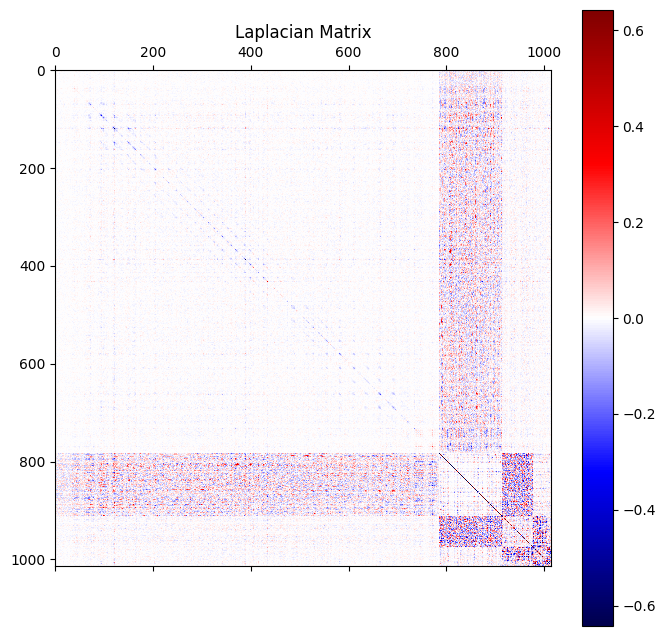

In [42]:
# plot heatmap of A

fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an Axes
cax = ax.matshow(L_reconstructed, cmap='seismic', vmin = -np.max(abs(A)), vmax = np.max(abs(A)))  # Plot on the specified Axes
fig.colorbar(cax, ax=ax)  # Add colorbar to that Axes
plt.title("Laplacian Matrix")
plt.show()

In [43]:
from plot_digits import *

313/313 [==============================] - 0s 669us/step


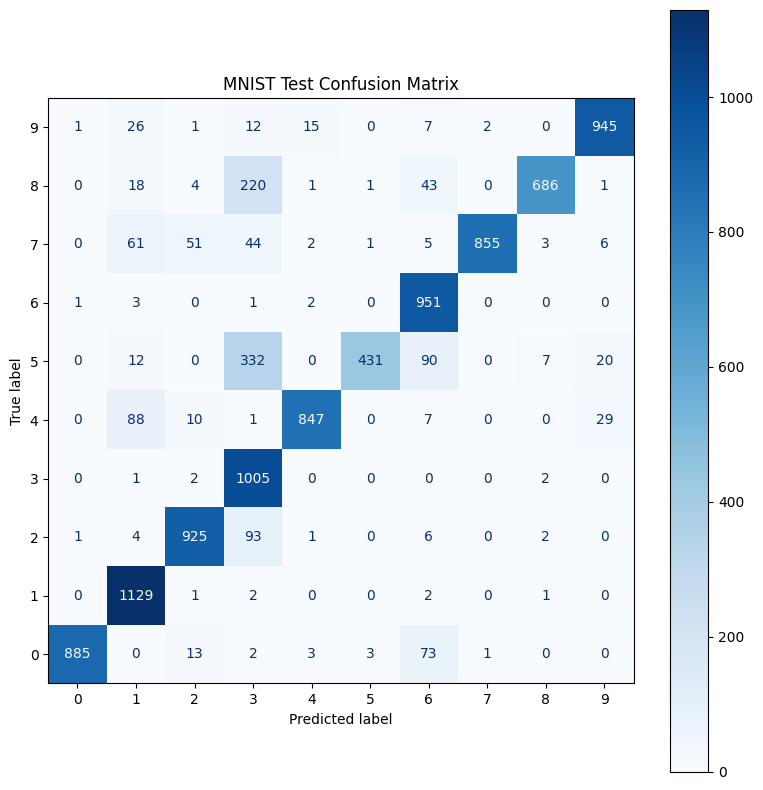

313/313 [==============================] - 0s 871us/step


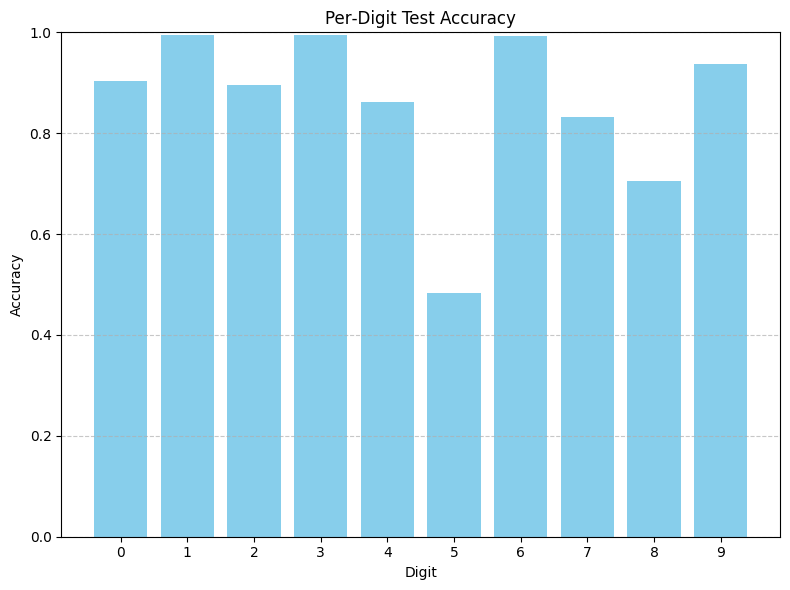

In [44]:
plot_confusion(new_net)
plot_digits(new_net)


In [11]:
a = np.array([1,2,3,4,5])
a[[]]

array([], dtype=int64)